In [ ]:
pip install pmdarima

     |████████████████████████████████| 1.4 MB 7.7 MB/s 
     |████████████████████████████████| 9.8 MB 32.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import numpy as np 
import pandas as pd 
import os
from subprocess import check_output
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if __name__ == '__main__':


In [ ]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
stock_data = pd.read_csv('trainset.csv',sep=',', index_col='Date', parse_dates=['Date'], date_parser=dateparse).fillna(0)
stock_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900
...,...,...,...,...,...,...
2017-12-22,1061.109985,1064.199951,1059.439941,1060.119995,1060.119995,755100
2017-12-26,1058.069946,1060.119995,1050.199951,1056.739990,1056.739990,760600
2017-12-27,1057.390015,1058.369995,1048.050049,1049.369995,1049.369995,1271900


In [ ]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


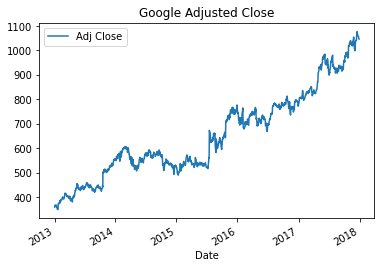

In [ ]:
#Plotting the Adjusted close value
stock_data[['Adj Close']].plot()
plt.title("Google Adjusted Close")
plt.show()

In [ ]:
stock_data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
stock_data.reset_index(level=0, inplace=True)

In [ ]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [ ]:
#Checking distribuition of time series data across years
stock_data['Date'].dt.year.value_counts()

2013    252
2014    252
2015    252
2016    252
2017    251
Name: Date, dtype: int64

In [ ]:
#Checking Null Values
stock_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
stock_data.shape

(1259, 7)

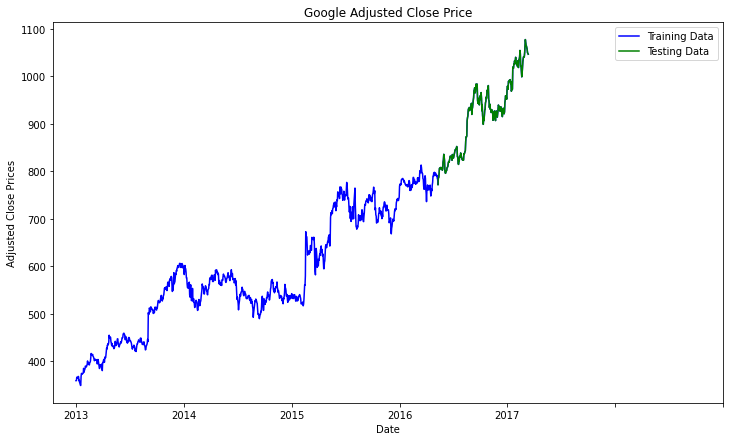

In [ ]:
#Splitting into data into test & Training Set
train_data, test_data = stock_data[0:int(len(stock_data)*0.8)], stock_data[int(len(stock_data)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Google Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Prices')
plt.plot(stock_data['Adj Close'], 'blue', label='Training Data')
plt.plot(test_data['Adj Close'], 'green', label='Testing Data')
plt.xticks(np.arange(0,2000,300), stock_data['Date'].dt.year[0:2000:300])
plt.legend()

In [ ]:
train_data.shape, test_data.shape

((1007, 7), (252, 7))

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

In [ ]:
adfuller(train_data['Adj Close'])

(-1.3235144000628694,
 0.6183469733520031,
 0,
 1006,
 {'1%': -3.436866962597422,
  '10%': -2.5683020002450507,
  '5%': -2.864417284603703},
 7054.6459541102995)

In [ ]:
trainS=log(train_data['Adj Close']).diff()
adfuller(trainS[1:])

(-30.58376043708071,
 0.0,
 0,
 1005,
 {'1%': -3.4368734638130847,
  '10%': -2.5683035273879358,
  '5%': -2.8644201518188126},
 -5529.600439188271)

In [ ]:
testS=log(test_data['Adj Close']).diff()
adfuller(testS[1:])

(-15.231252614160367,
 5.317527486016436e-28,
 0,
 250,
 {'1%': -3.456780859712, '10%': -2.572968544, '5%': -2.8731715065600003},
 -1496.5260309028895)

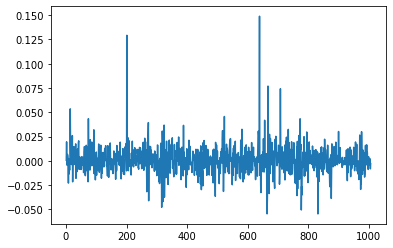

In [ ]:
trainS.plot()

In [ ]:
from pmdarima.arima import auto_arima

from statsmodels.tsa.arima_model import ARIMA 
import statsmodels.api as sm

In [ ]:
arima_model=auto_arima(trainS[1:],start_p=1,start_q=1,max_p=5,max_q=5,trace=True,error_action='warn',suppress_warnings=True,stepwise=True,random_state=20,n_fits=30)


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-5651.223, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-5653.974, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-5653.196, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-5653.222, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-5653.126, Time=0.11 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.304 seconds


In [ ]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1006
Model:                        SARIMAX   Log Likelihood                2828.987
Date:                Thu, 28 Apr 2022   AIC                          -5653.974
Time:                        04:04:17   BIC                          -5644.147
Sample:                             0   HQIC                         -5650.240
                               - 1006                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0008      0.001      1.541      0.123      -0.000       0.002
sigma2         0.0002   3.27e-06     64.689      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   1.23   Jarque-Bera (JB):             14140.71
Prob(Q):                              0.27   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                             1.83
Prob(H) (two-sided):                  0.32   Kurtosis:                        21.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#Making final predictions using ARIMA function
train_ar = trainS[1:].values
test_ar = testS[1:].values

history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = sm.tsa.arima.ARIMA(history, order=(0,0,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
print('Testing Mean Squared Error: %.5f' % mean_squared_error(test_ar, predictions))
print('Testing Mean Absolute Error: %.5f' % mean_absolute_error(test_ar, predictions))

<class 'list'>


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: 

Testing Mean Squared Error: 0.00009
Testing Mean Absolute Error: 0.00697


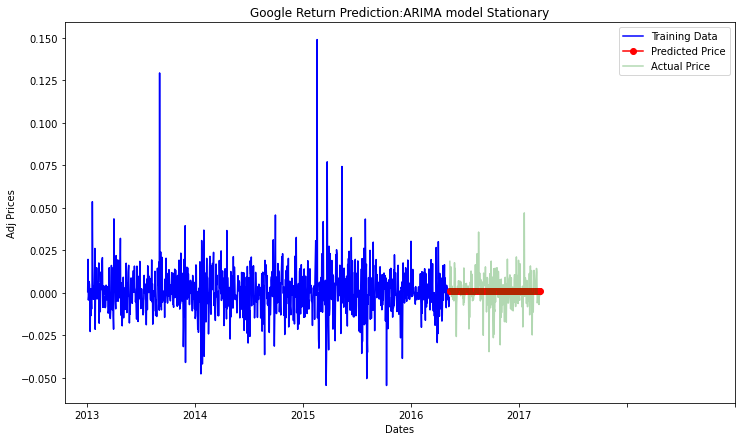

In [ ]:
#Plotting the output
plt.figure(figsize=(12,7))
plt.plot(trainS[1:], 'green', color='blue', label='Training Data')
plt.plot(test_data.index[1:],predictions, color='red', marker='o',
         label='Predicted Price')
plt.plot(test_data.index[1:], testS[1:].values, color='green', label='Actual Price',alpha=0.3)
plt.title('Google Return Prediction:ARIMA model Stationary')
plt.xlabel('Dates')
plt.ylabel('Adj Prices')
plt.xticks(np.arange(0,2000,300), stock_data['Date'].dt.year[0:2000:300])
plt.legend()

In [ ]:
testS[1007]=np.log(test_data['Adj Close'][1007])
ArimaModel=pd.DataFrame(np.exp(testS.cumsum()))
ArimaModel.rename(columns={'Adj Close': 'Y_Test'},inplace=True)

In [ ]:
PredictedValue=[x.tolist() for x in predictions]
PredictedValue=[val for val in PredictedValue ]
PredictedValue.insert(0,np.log(test_data['Adj Close'][1007]))
ArimaModel['ARIMA_Prediction']=PredictedValue
ArimaModel['ARIMA_Prediction']=pd.DataFrame(np.exp(ArimaModel['ARIMA_Prediction'].cumsum()))
ArimaModel.drop(ArimaModel.head(1).index, inplace=True)

In [ ]:
ArimaModel.head(20)


,Y_Test,ARIMA_Prediction
1008,786.140015,772.413845
1009,786.900024,773.021667
1010,794.020020,773.630120
1011,806.150024,774.245331
1012,806.650024,774.872084
1013,804.789978,775.499195
1014,807.909973,776.124419
1015,806.359985,776.752494
1016,807.880005,777.378984
1017,804.609985,778.006803


In [ ]:
#ARIMA model mean squared error
print('RMSE: %.2f' % np.sqrt(mean_squared_error(ArimaModel['Y_Test'], ArimaModel['ARIMA_Prediction'])))

RMSE: 73.23


In [ ]:
#ARIMA model mean absolute error
print('MAE: %.2f' % mean_absolute_error(ArimaModel['Y_Test'], ArimaModel['ARIMA_Prediction']))

MAE: 63.64
